In [ ]:
%matplotlib inline
import re
from os import path, getenv, environ
from typing import Dict

from datetime import datetime

import folium
import matplotlib.pyplot as plt
#import missingno as msno
import numpy as np
import pandas as pd
import plotly.express as px
import scipy
import scipy.stats as stats
import seaborn as sns
from sklearn import set_config
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

set_config(display="diagram", print_changed_only=False)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
base_class = pd.read_csv("base_class22.csv", sep=",")

<ipython-input-2-cf8900206d81>:1: DtypeWarning: Columns (8,64) have mixed types. Specify dtype option on import or set low_memory=False.
  base_class = pd.read_csv("base_class22(1).csv", sep=",")


In [ ]:
base_class.head()

,id_personne,entite_eco,personne_morale,annee_soins,colloc,adh_fac,type_cont,genre,code_postal,Age22,type_benef,tranche_age22,Foyer22,rg_benef,PRES2201,PRES2202,PRES2203,PRES2204,PRES2205,PRES2206,PRES2207,PRES2208,PRES2209,PRES2210,PRES2211,PRES2212,nb_benef_dep,nb_occ_id,ra_01,ra_02,ra_03,ra_04,ra_05,ra_06,ra_07,ra_08,ra_09,ra_10,ra_11,ra_12,fra_01,fra_02,fra_03,fra_04,fra_05,fra_06,fra_07,fra_08,fra_09,fra_10,fra_11,fra_12,delta_01,delta_02,delta_03,delta_04,delta_05,delta_06,delta_07,delta_08,delta_09,delta_10,delta_11,delta_12,genre_num,pp_mens_act,pp_an_act,soe_pres22,soe_ra,Annee_pres22,Annee_cons22,genre_cat,type_benef_cat
0,0000031a283216ec643bea5b46511325bb088033d75a379188a37162cf4ebb10,EE7,PM7,2022,non,non,0.0,Femme,13540,45.0,Salarie,[45; 50[,Salarie et conjoint et 2 enfants,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6,1,0.0,0.590000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.000,0.0,1.68,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.049167,0.590000,12.0,0.590000,2022,2022,2,1
1,00002650c3250e7fe5b197f45a27ab2e4fc38c1cdee65ce8e08a43186b8ac4b8,EE2703,PM3563,2022,non,non,0.0,Enfant,41000,10.0,Enfant mineur,[10; 15[,Salarie et conjoint et 2 enfants,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1103,2,0.0,0.000000,0.0,0.602857,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.000,0.0,0.00,0.0,1.72,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.050238,0.602857,12.0,0.602857,2022,2022,3,4
2,0000329a0a7e29081ee5dafa006d627f7eb4db82c046ad2f36f609ccd3101a63,EE1979,PM2,2022,0,0,0.0,Enfant,99999,3.0,Enfant mineur,[0; 5[,Salarie et conjoint et 3+ enfants,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,200844,1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.000,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.000000,0.000000,12.0,0.000000,2022,no cons,3,4
3,00003cd2efe009e8bfea54a7de13f162e5359495da8cf9f04258104c845ffdfe,EE2948,PM3908,2022,non,non,0.0,Enfant,75018,26.0,Enfant majeur,[25; 30[,Salarie et conjoint et 3+ enfants,3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6370,3,0.0,0.651667,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.536,0.0,1.34,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,1.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.098972,1.187667,12.0,1.187667,2022,2022,3,3
4,0000458142f363a32276d020258f637fa4b173c8471e6e73049eadea49753db1,EE2149,PM2680,2022,non,non,0.0,Homme,33400,32.0,Salarie,[30; 35[,Salarie et conjoint et 2 enfants,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1359,4,0.0,0.000000,0.0,0.000000,0.0,0.0,0.523333,1.435714,0.0,6.912,0.0,0.000,0.0,0.00,0.0,0.00,0.0,0.0,1.49,3.325714,0.0,19.74,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0.739254,8.871048,12.0,8.871048,2022,2022,1,1


In [ ]:
relevant_columns = [
     'ra_01', 'ra_02', 'ra_03', 'ra_04', 'ra_05', 'ra_06', 'ra_07', 'ra_08', 'ra_09', 'ra_10', 'ra_11', 'ra_12',
    'genre', 'type_benef', 'Foyer22', "Age22", 'pp_mens_act', "code_postal"
]

In [ ]:
base_class_kmeans = base_class[relevant_columns]

In [ ]:
base_class_kmeans = pd.get_dummies(base_class_kmeans, columns=['genre', 'type_benef', 'Foyer22'], prefix=['is_genre', 'is_benef', 'is_foyer'])

In [ ]:
department_to_region = {
    # Auvergne-Rhône-Alpes (AURA)
    '01': 'AURA', '03': 'AURA', '07': 'AURA', '15': 'AURA', '26': 'AURA', '38': 'AURA',
    '42': 'AURA', '43': 'AURA', '63': 'AURA', '69': 'AURA', '73': 'AURA', '74': 'AURA',

    # Bourgogne-Franche-Comté (BFC)
    '21': 'BFC', '25': 'BFC', '39': 'BFC', '58': 'BFC', '70': 'BFC', '71': 'BFC', '89': 'BFC', '90': 'BFC',

    # Bretagne (BRE)
    '22': 'BRE', '29': 'BRE', '35': 'BRE', '56': 'BRE',

    # Centre-Val de Loire (CVL)
    '18': 'CVL', '28': 'CVL', '36': 'CVL', '37': 'CVL', '41': 'CVL', '45': 'CVL',

    # Corse (COR)
    '2A': 'COR', '2B': 'COR',

    # Grand Est (GE)
    '08': 'GE', '10': 'GE', '51': 'GE', '52': 'GE', '54': 'GE', '55': 'GE', '57': 'GE', '67': 'GE', '68': 'GE', '88': 'GE',

    # Hauts-de-France (HDF)
    '02': 'HDF', '59': 'HDF', '60': 'HDF', '62': 'HDF', '80': 'HDF',

    # Île-de-France (IDF)
    '75': 'IDF', '77': 'IDF', '78': 'IDF', '91': 'IDF', '92': 'IDF', '93': 'IDF', '94': 'IDF', '95': 'IDF',

    # Normandie (NOR)
    '14': 'NOR', '27': 'NOR', '50': 'NOR', '61': 'NOR', '76': 'NOR',

    # Nouvelle-Aquitaine (NAQ)
    '16': 'NAQ', '17': 'NAQ', '19': 'NAQ', '23': 'NAQ', '24': 'NAQ', '33': 'NAQ', '40': 'NAQ', '47': 'NAQ', '64': 'NAQ',
    '79': 'NAQ', '86': 'NAQ', '87': 'NAQ',

    # Occitanie (OCC)
    '09': 'OCC', '11': 'OCC', '12': 'OCC', '30': 'OCC', '31': 'OCC', '32': 'OCC', '34': 'OCC', '46': 'OCC', '48': 'OCC',
    '65': 'OCC', '66': 'OCC', '81': 'OCC', '82': 'OCC',

    # Pays de la Loire (PDL)
    '44': 'PDL', '49': 'PDL', '53': 'PDL', '72': 'PDL', '85': 'PDL',

    # Provence-Alpes-Côte d’Azur (PACA)
    '04': 'PACA', '05': 'PACA', '06': 'PACA', '13': 'PACA', '83': 'PACA', '84': 'PACA',

    # Guadeloupe (GUA)
    '971': 'GUA',

    # Martinique (MAR)
    '972': 'MAR',

    # Guyane (GUY)
    '973': 'GUY',

    # La Réunion (REU)
    '974': 'REU',

    # Mayotte (MAY)
    '976': 'MAY',

    # Etranger
    '99' : 'ETR'
}

# Extract department numbers
base_class_kmeans['department'] = base_class_kmeans['code_postal'].astype(str).str[:2]

# Map departments to regions
base_class_kmeans['region'] = base_class_kmeans['department'].map(department_to_region)

# One-hot encode regions
base_class_kmeans = pd.get_dummies(base_class_kmeans, columns=['region'], prefix='region')

base_class_kmeans = base_class_kmeans.drop('department', axis=1)

In [ ]:
boolean_cols = base_class_kmeans.select_dtypes(include='bool').columns
base_class_kmeans[boolean_cols] = base_class_kmeans[boolean_cols].astype(int)

In [ ]:
base_class_kmeans.head()

,ra_01,ra_02,ra_03,ra_04,ra_05,ra_06,ra_07,ra_08,ra_09,ra_10,ra_11,ra_12,Age22,pp_mens_act,code_postal,is_genre_Enfant,is_genre_Femme,is_genre_Homme,is_benef_Conjoint,is_benef_Enfant majeur,is_benef_Enfant mineur,is_benef_Salarie,is_foyer_ND,is_foyer_Salarie et 1 enfant,is_foyer_Salarie et 2 enfants,is_foyer_Salarie et 3+ enfants,is_foyer_Salarie et conjoint et 1 enfant,is_foyer_Salarie et conjoint et 2 enfants,is_foyer_Salarie et conjoint et 3+ enfants,is_foyer_Salarie et conjoint sans enfant,is_foyer_Salarie seul,region_AURA,region_BFC,region_BRE,region_CVL,region_GE,region_HDF,region_IDF,region_NAQ,region_NOR,region_OCC,region_PACA,region_PDL
0,0.0,0.590000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.000,45.0,0.049167,13540,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0.0,0.000000,0.0,0.602857,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.000,10.0,0.050238,41000,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.000,3.0,0.000000,99999,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,0.651667,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.536,26.0,0.098972,75018,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0.0,0.000000,0.0,0.000000,0.0,0.0,0.523333,1.435714,0.0,6.912,0.0,0.000,32.0,0.739254,33400,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
base_class_kmeans = base_class_kmeans.drop('code_postal', axis=1)

In [ ]:
print(base_class_kmeans.dtypes)

ra_01                                         float64
ra_02                                         float64
ra_03                                         float64
ra_04                                         float64
ra_05                                         float64
ra_06                                         float64
ra_07                                         float64
ra_08                                         float64
ra_09                                         float64
ra_10                                         float64
ra_11                                         float64
ra_12                                         float64
Age22                                         float64
pp_mens_act                                   float64
is_genre_Enfant                                 int64
is_genre_Femme                                  int64
is_genre_Homme                                  int64
is_benef_Conjoint                               int64
is_benef_Enfant majeur      

In [ ]:
scaler = StandardScaler()

base_class_scaled = scaler.fit_transform(base_class_kmeans)
base_class_scaled = pd.DataFrame(base_class_scaled, columns=base_class_kmeans.columns)

In [ ]:
base_class_scaled.head()

,ra_01,ra_02,ra_03,ra_04,ra_05,ra_06,ra_07,ra_08,ra_09,ra_10,ra_11,ra_12,Age22,pp_mens_act,is_genre_Enfant,is_genre_Femme,is_genre_Homme,is_benef_Conjoint,is_benef_Enfant majeur,is_benef_Enfant mineur,is_benef_Salarie,is_foyer_ND,is_foyer_Salarie et 1 enfant,is_foyer_Salarie et 2 enfants,is_foyer_Salarie et 3+ enfants,is_foyer_Salarie et conjoint et 1 enfant,is_foyer_Salarie et conjoint et 2 enfants,is_foyer_Salarie et conjoint et 3+ enfants,is_foyer_Salarie et conjoint sans enfant,is_foyer_Salarie seul,region_AURA,region_BFC,region_BRE,region_CVL,region_GE,region_HDF,region_IDF,region_NAQ,region_NOR,region_OCC,region_PACA,region_PDL
0,-0.059818,0.054227,-0.066163,-0.055342,-0.056255,-0.065665,-0.05179,-0.051772,-0.058213,-0.058602,-0.06057,-0.058427,0.313229,-0.124592,-0.658475,1.400310,-0.749692,-0.419857,-0.202416,-0.597511,0.908768,-0.130354,-0.227943,-0.2308,-0.177542,-0.316593,1.977902,-0.497460,-0.275293,-0.637962,-0.286673,-0.180977,-0.185319,-0.169684,-0.23262,-0.23698,-0.478751,-0.304497,-0.1914,-0.303131,4.741509,-0.195784
1,-0.059818,-0.053537,-0.066163,0.059154,-0.056255,-0.065665,-0.05179,-0.051772,-0.058213,-0.058602,-0.06057,-0.058427,-0.644005,-0.124060,1.518660,-0.714127,-0.749692,-0.419857,-0.202416,1.673610,-1.100390,-0.130354,-0.227943,-0.2308,-0.177542,-0.316593,1.977902,-0.497460,-0.275293,-0.637962,-0.286673,-0.180977,-0.185319,5.893319,-0.23262,-0.23698,-0.478751,-0.304497,-0.1914,-0.303131,-0.210903,-0.195784
2,-0.059818,-0.053537,-0.066163,-0.055342,-0.056255,-0.065665,-0.05179,-0.051772,-0.058213,-0.058602,-0.06057,-0.058427,-0.835452,-0.149014,1.518660,-0.714127,-0.749692,-0.419857,-0.202416,1.673610,-1.100390,-0.130354,-0.227943,-0.2308,-0.177542,-0.316593,-0.505586,2.010211,-0.275293,-0.637962,-0.286673,-0.180977,-0.185319,-0.169684,-0.23262,-0.23698,-0.478751,-0.304497,-0.1914,-0.303131,-0.210903,-0.195784
3,-0.059818,0.065491,-0.066163,-0.055342,-0.056255,-0.065665,-0.05179,-0.051772,-0.058213,-0.058602,-0.06057,0.032937,-0.206413,-0.099853,1.518660,-0.714127,-0.749692,-0.419857,4.940316,-0.597511,-1.100390,-0.130354,-0.227943,-0.2308,-0.177542,-0.316593,-0.505586,2.010211,-0.275293,-0.637962,-0.286673,-0.180977,-0.185319,-0.169684,-0.23262,-0.23698,2.088769,-0.304497,-0.1914,-0.303131,-0.210903,-0.195784
4,-0.059818,-0.053537,-0.066163,-0.055342,-0.056255,-0.065665,0.05065,0.254064,-0.058213,1.204431,-0.06057,-0.058427,-0.042315,0.218186,-0.658475,-0.714127,1.333881,-0.419857,-0.202416,-0.597511,0.908768,-0.130354,-0.227943,-0.2308,-0.177542,-0.316593,1.977902,-0.497460,-0.275293,-0.637962,-0.286673,-0.180977,-0.185319,-0.169684,-0.23262,-0.23698,-0.478751,3.284101,-0.1914,-0.303131,-0.210903,-0.195784


In [ ]:
# Removing outliers
from scipy.stats import zscore
base_class_array = base_class_kmeans.values

base_class_array = base_class_array.astype(np.float32)
z_scores = np.abs(zscore(base_class_array))
outliers = np.where(z_scores > 3)

print("Outliers:", outliers, len(outliers))


base_class_array_cleaned = base_class_array[(z_scores < 3).all(axis=1)]


Outliers: (array([     0,      1,      3, ..., 804627, 804628, 804629]), array([40, 33, 18, ..., 18, 37, 22])) 2


In [ ]:
def initialize_centroids(base_class, k):

    centroids = base_class[np.random.choice(base_class.shape[0], k, replace=False)]
    return centroids

In [ ]:
test_1 = initialize_centroids(base_class, 3)

In [ ]:
def assign_clusters(base_class, centroids):

    distances = np.linalg.norm(base_class[:, np.newaxis] - centroids, axis=2)

    cluster_labels = np.argmin(distances, axis=1)
    return cluster_labels

In [ ]:
test = assign_clusters(base_class, test_1)

In [ ]:
def update_centroids(base_class, cluster_labels, k):
    new_centroids = np.array([base_class[cluster_labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

In [ ]:
def kmeans(base_class, k, max_iters=100, tol=1e-4):

    # Initialisation des centroids

    centroids = initialize_centroids(base_class, k)

    for _ in range(max_iters):
        # On attribu à chaque point un cluster
        cluster_labels = assign_clusters(base_class, centroids)

        # On calcule les nouveaux centroids
        new_centroids = update_centroids(base_class, cluster_labels, k)

        # On vérifie la convergence
        if np.all(np.abs(new_centroids - centroids) < tol):
            break

        centroids = new_centroids
            # Calculate WCSS (sum of squared distances to closest centroid)
        wcss = np.sum(
          np.min(np.linalg.norm(base_class[:, np.newaxis] - centroids, axis=2) ** 2, axis=1)
        )
    return cluster_labels, centroids, wcss

<ipython-input-19-ca896ef6c1fa>:2: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([base_class[cluster_labels == i].mean(axis=0) for i in range(k)])
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


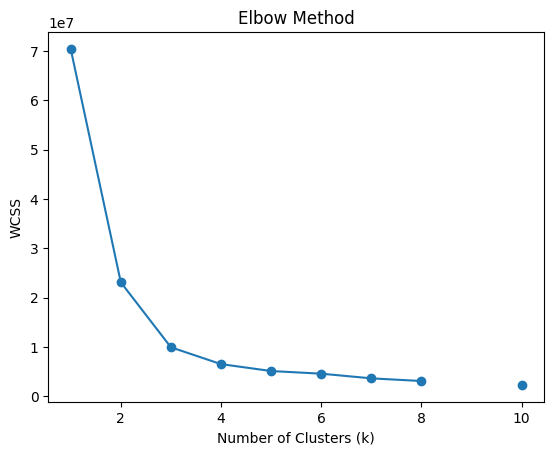

In [ ]:
# Elbow method to determine optimal k


wcss = []
for k in range(1, 11):
    _, _, current_wcss = kmeans(base_class_array_cleaned, k)
    wcss.append(current_wcss)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

# Pick k = 3

k = 3

In [ ]:
cluster_labels, final_centroids, _ = kmeans(base_class_array_cleaned, k = 3)

print("Cluster Labels:", cluster_labels)
print("Final Centroids:", final_centroids)

Cluster Labels: [3 3 3 ... 0 1 3]
Final Centroids: [[7.35574663e-02 7.06787109e-02 8.02226141e-02 8.18969533e-02
  8.12805668e-02 8.49634707e-02 7.68992901e-02 6.43089414e-02
  7.86408484e-02 7.99069554e-02 8.25371742e-02 9.02909711e-02
  2.65420055e+01 7.87657201e-02 3.90574671e-02 4.97616291e-01
  4.63326246e-01 5.17652370e-02 0.00000000e+00 3.90574671e-02
  9.09177303e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 8.73598754e-02 6.03659339e-02
  0.00000000e+00 8.52274179e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  3.58620018e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.10483959e-01 1.02108620e-01 1.15408786e-01 1.11639380e-01
  1.07118540e-01 1.18644938e-01 1.06480382e-01 8.35585296e-02
  1.06535822e-01 1.09927431e-01 1.08879149e-01 1.19498514e-01
  3.90923080e+01 1.08356491e-01 0.00000000e+00 5.46786189e-01
  4.53213781e-01 2.45375052e-01 0.00000000e+00 0

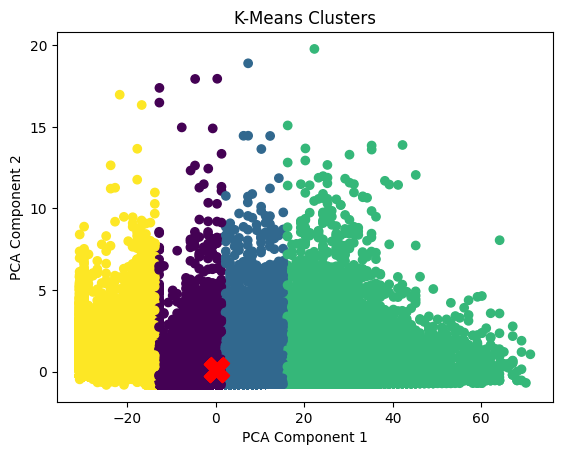

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca = PCA(n_components=2)
base_class_pca = pca.fit_transform(base_class_array_cleaned)


plt.scatter(base_class_pca[:, 0], base_class_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], s=300, c='red', marker='X')  # Centroids
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clusters')
plt.show()


In [ ]:
# Save the original column names
original_column_names = base_class_kmeans.columns.tolist()

# Create the DataFrame with proper column names
clustered_data = pd.DataFrame(base_class_array_cleaned, columns=original_column_names)

# Add the cluster labels
clustered_data['Cluster'] = cluster_labels

# Group by Cluster and calculate the mean
print(clustered_data.groupby('Cluster').mean())

            ra_01     ra_02     ra_03     ra_04     ra_05     ra_06     ra_07  \
Cluster                                                                         
0        0.073557  0.070678  0.080222  0.081897  0.081280  0.084963  0.076899   
1        0.110484  0.102108  0.115408  0.111639  0.107118  0.118645  0.106480   
2        0.177155  0.174350  0.190911  0.181067  0.180687  0.183850  0.177817   
3        0.114203  0.089327  0.100713  0.097352  0.101518  0.113751  0.088649   

            ra_08     ra_09     ra_10     ra_11     ra_12      Age22  \
Cluster                                                                
0        0.064309  0.078640  0.079907  0.082537  0.090290  26.542006   
1        0.083558  0.106536  0.109927  0.108879  0.119498  39.092308   
2        0.134561  0.174117  0.179687  0.183460  0.188056  54.509754   
3        0.070495  0.124324  0.120395  0.115735  0.120740   8.416329   

         pp_mens_act  is_genre_Enfant  is_genre_Femme  is_genre_Homme  \
Cluster